In [176]:
import pysam
from collections import OrderedDict
from Bio import SeqIO
import pandas as pd

In [2]:
cd /Users/davidchen/Downloads/Miniscreen01


/Users/davidchen/Downloads/Miniscreen01


# Bowtie Parameters

conda install bowtie2

bowtie2-build -f gRNAmotifs_reference.fasta gRNAmotifs_reference

bowtie2 --very-sensitive-local -x gRNAmotifs_reference -1 20200709_6_NS8056_S6_R1_001.fastq -2 20200709_6_NS8056_S6_R2_001.fastq test.sam

# Read in SAM file

In [3]:
samfile = pysam.AlignmentFile("test.bam", "rb")

In [4]:
list_chrom_sizes = OrderedDict(zip(samfile.references,
                                       samfile.lengths))

In [5]:
list_chrom_sizes

OrderedDict([('gRNA_reference', 1500)])

# Guide RNA Lengths

In [6]:
gRNA_length = OrderedDict() 
for seq_record in SeqIO.parse("gRNAmotifs.fasta", "fasta"):
    gRNA_length[seq_record.id] = len(seq_record)

In [7]:
gRNA_length

OrderedDict([('Seq1', 24),
             ('Vec', 20),
             ('SOX9_g1', 19),
             ('SOX9_g2', 19),
             ('SOX9_g3', 19),
             ('SOX9_g4', 19),
             ('SOX9_g5', 19),
             ('SOX9_g6', 19),
             ('PROM1_g1', 19),
             ('PROM1_g2', 19),
             ('PROM1_g3', 19),
             ('PROM1_g4', 19),
             ('PROM1_g5', 19),
             ('PROM1_g6', 19),
             ('KRT20_g1', 19),
             ('KRT20_g2', 19),
             ('KRT20_g3', 19),
             ('KRT20_g4', 19),
             ('KRT20_g5', 19),
             ('KRT20_g6', 19),
             ('LRIG1_g1', 19),
             ('LRIG1_g2', 19),
             ('LRIG1_g3', 19),
             ('LRIG1_g4', 19),
             ('LRIG1_g5', 19),
             ('LRIG1_g6', 19),
             ('CTRL0001_g1', 19),
             ('CTRL0002_g2', 19),
             ('CTRL0003_g3', 19),
             ('CTRL0004_g4', 19),
             ('CTRL0005_g5', 19),
             ('CTRL0006_g6', 19),
     

# Guide RNA Coordinates in Combined Reference Genome

In [8]:
gRNA_coords = OrderedDict()
counter = 0
for gRNA in range(len(gRNA_length)):
    start = 0 + counter
    end = list(gRNA_length.items())[gRNA][1] + counter
    gRNA_coords[list(gRNA_length.items())[gRNA][0]] = [start, end]
    counter += list(gRNA_length.items())[gRNA][1]

In [9]:
gRNA_coords

OrderedDict([('Seq1', [0, 24]),
             ('Vec', [24, 44]),
             ('SOX9_g1', [44, 63]),
             ('SOX9_g2', [63, 82]),
             ('SOX9_g3', [82, 101]),
             ('SOX9_g4', [101, 120]),
             ('SOX9_g5', [120, 139]),
             ('SOX9_g6', [139, 158]),
             ('PROM1_g1', [158, 177]),
             ('PROM1_g2', [177, 196]),
             ('PROM1_g3', [196, 215]),
             ('PROM1_g4', [215, 234]),
             ('PROM1_g5', [234, 253]),
             ('PROM1_g6', [253, 272]),
             ('KRT20_g1', [272, 291]),
             ('KRT20_g2', [291, 310]),
             ('KRT20_g3', [310, 329]),
             ('KRT20_g4', [329, 348]),
             ('KRT20_g5', [348, 367]),
             ('KRT20_g6', [367, 386]),
             ('LRIG1_g1', [386, 405]),
             ('LRIG1_g2', [405, 424]),
             ('LRIG1_g3', [424, 443]),
             ('LRIG1_g4', [443, 462]),
             ('LRIG1_g5', [462, 481]),
             ('LRIG1_g6', [481, 500]),
           

# Read Count DF Formatting

In [410]:
read_counts = pd.read_excel('/Users/davidchen/Downloads/MiniScreen01_normalized data.xlsx', sheet_name="total read normalization").iloc[:15, 1:-5].T

In [411]:
read_counts.insert(loc=0, column="sgRNA", value=read_counts.index)

In [412]:
read_counts.insert(loc=1, column="Gene", value=[identifier.split("_")[0] for identifier in read_counts.index])

In [413]:
columns_dict = {}
for i in read_counts.columns[2:]:
    columns_dict[i] = "S" + str(int(i)+1)

In [414]:
read_counts = read_counts.rename(columns=columns_dict)

In [415]:
read_counts.reset_index(inplace=True, drop=True)

In [416]:
read_counts

,sgRNA,Gene,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15
0,SOX9_g1,SOX9,753,2028,1929,1825,241,92,207,1219,1068,916,1612,899,2115,1769,926
1,SOX9_g2,SOX9,546,1294,1790,1293,208,102,155,982,728,835,1265,653,2218,1745,786
2,SOX9_g3,SOX9,476,1207,1052,1159,196,77,151,855,684,512,663,534,2103,1564,538
3,SOX9_g4,SOX9,344,955,769,879,137,56,135,784,582,518,951,467,1185,949,483
4,SOX9_g5,SOX9,788,2237,1837,2125,299,108,241,1353,1099,1047,1971,925,1985,1609,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,mKate2_g2,mKate2,1345,2216,1363,2042,276,110,243,1819,1830,1534,1680,1433,1534,1169,1163
72,mKate2_g3,mKate2,1177,2880,1699,2395,322,206,301,2221,2572,1743,2111,1834,1920,1791,1257
73,mKate2_g4,mKate2,714,1211,907,1228,201,87,240,1417,1333,874,986,1072,1075,859,517
74,mKate2_g5,mKate2,5,12,0,10,0,2,0,2,13,7,4,2,6,6,2


In [417]:
read_counts.to_csv('/Users/davidchen/Downloads/Miniscreen01/Read_Counts.csv', index=None, sep='\t', mode='a')

### Comparison of S1 to S3

In [404]:
gene_summary = pd.read_csv('/Users/davidchen/Downloads/Miniscreen01/demo.gene_summary.txt', sep="\t")

In [405]:
gene_summary

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
0,EGFP,6,3.913800e-07,0.000005,0.000095,1,6,-2.839900,1.000000,1.000000,0.999995,19,0,-2.839900
1,SOX9,6,3.851600e-04,0.002044,0.019421,2,6,-1.091300,0.999610,0.999560,0.999995,18,0,-1.091300
2,CTRL0003,1,1.381600e-01,0.138640,0.718685,3,1,-0.074634,0.861840,0.862920,0.964443,17,0,-0.074634
3,CTRL0006,1,1.513200e-01,0.151300,0.718685,4,1,-0.262610,0.848680,0.849580,0.964443,16,0,-0.262610
4,CTRL0007,1,2.039500e-01,0.203620,0.773770,5,1,-0.238990,0.796050,0.797970,0.964443,15,0,-0.238990
5,CTRL0009,1,2.960500e-01,0.296930,0.792624,6,1,-0.215220,0.703950,0.704840,0.964443,13,0,-0.215220
6,CTRL0008,1,3.092100e-01,0.309400,0.792624,7,1,-0.259360,0.690790,0.691970,0.964443,12,0,-0.259360
7,CTRL0005,1,3.355300e-01,0.335700,0.792624,8,1,-0.090240,0.664470,0.666640,0.964443,11,0,-0.090240
8,CTRL0002,1,3.750000e-01,0.375450,0.792624,9,1,-0.084727,0.625000,0.626950,0.964443,9,0,-0.084727
9,CTRL0001,1,4.407900e-01,0.440820,0.837559,10,1,-0.071423,0.559210,0.560010,0.964443,7,0,-0.071423


In [406]:
sgrna_summary = pd.read_csv('/Users/davidchen/Downloads/Miniscreen01/demo.sgrna_summary.txt', sep="\t")

In [407]:
sgrna_summary

,sgrna,Gene,control_count,treatment_count,control_mean,treat_mean,LFC,control_var,adj_var,score,p.low,p.high,p.twosided,FDR,high_in_treatment
0,mKate2_g1,mKate2,0.96806,7.2529,0.96806,7.2529,2.068100,1.974900e+01,1.869700e+00,4.596200e+00,1.000000,0.000003,0.000006,0.000430,True
1,EGFP_g1,EGFP,5831.60000,676.5900,5831.60000,676.5900,-3.105700,1.328700e+07,1.016600e+12,3.272500e+00,0.000533,0.999470,0.001066,0.021433,False
2,EGFP_g2,EGFP,6711.50000,867.2300,6711.50000,867.2300,-2.950700,1.707800e+07,1.591300e+12,3.265600e+00,0.000546,0.999450,0.001092,0.021433,False
3,EGFP_g5,EGFP,5670.90000,684.8800,5670.90000,684.8800,-3.047800,1.243000e+07,9.299000e+11,3.256500e+00,0.000564,0.999440,0.001128,0.021433,False
4,EGFP_g4,EGFP,5192.70000,782.2700,5192.70000,782.2700,-2.729200,9.725700e+06,7.021700e+11,3.178100e+00,0.000741,0.999260,0.001482,0.022532,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,PROM1_g1,PROM1,2515.00000,2642.1000,2515.00000,2642.1000,0.071100,8.077600e+03,6.959100e+10,4.818100e-04,0.007931,0.992070,0.015862,0.035919,True
72,ROSA26_g4,ROSA26,1163.60000,1197.8000,1163.60000,1197.8000,0.041701,5.832600e+02,5.960100e+09,4.424000e-04,0.012231,0.987770,0.024463,0.035919,True
73,ROSA26_g2,ROSA26,1509.20000,1560.4000,1509.20000,1560.4000,0.048102,1.310800e+03,1.365700e+10,4.381200e-04,0.010545,0.989460,0.021089,0.035919,True
74,AAVS1_g6,AAVS1,459.83000,463.1500,459.83000,463.1500,0.010357,5.511600e+00,3.087600e+08,1.889500e-04,0.020598,0.979400,0.041196,0.042309,True


# Brute Force Search

In [201]:
def fastq_seq(path):
    return [str(record.seq) for record in SeqIO.parse(path, "fastq")]

In [228]:
S6_1 = fastq_seq("20200709_6_NS8056_S6_R1_001.fastq")

In [227]:
S6_2 = fastq_seq("20200709_6_NS8056_S6_R2_001.fastq")

In [50]:
from itertools import islice,tee,repeat

def sub_findre(s,substring,diffnumber):
    sublen=len(substring)
    zip_gen=(zip(substring,islice(s,i,i+sublen),repeat(i,sublen)) for i in range(len(s)))
    for z in zip_gen:
        l,z=tee(z)
        if sum(1 for i,j,_ in l if i==j)>=sublen-diffnumber:
            new=zip(*z)
            next(new)
            next(new)
            yield next(new)[0]
            

In [172]:
def reference_search(reads,substring,diffnumber):
    counter = 0
    for i in reads:
        counter += int(len(list(sub_findre(i,substring,diffnumber))))
    return counter

In [213]:
reference_search(reads=S6_1,substring=reference_seq_dict['mKate2_g4'],diffnumber=0)

50

In [214]:
def library_search(reads, diffnumber, verbose=False):
    read_counts_df = pd.DataFrame(columns= list(reference_seq_dict.keys()))
    for key in list(reference_seq_dict.keys()):
        read_count = reference_search(reads=reads, substring = reference_seq_dict[key], diffnumber=diffnumber)
        read_counts_df[key] = [read_count]
        if verbose == True: 
            print(str(key) + " search in reads with " + str(diffnumber) + " mismatches complete.")
    return read_counts_df

In [216]:
S6_1_0 = library_search(reads=S6_1, diffnumber=0, verbose=False)

In [217]:
S6_1_1 = library_search(reads=S6_1, diffnumber=1, verbose=False)

In [218]:
S6_1_2 = library_search(reads=S6_1, diffnumber=2, verbose=False)

In [223]:
S6_1_3 = library_search(reads=S6_1, diffnumber=3, verbose=False)

In [224]:
S6_1_4 = library_search(reads=S6_1, diffnumber=4, verbose=False)

In [225]:
S6_1_5 = library_search(reads=S6_1, diffnumber=5, verbose=False)

In [229]:
S6_2_0 = library_search(reads=S6_2, diffnumber=0, verbose=False)

In [230]:
S6_2_1 = library_search(reads=S6_2, diffnumber=1, verbose=False)

In [231]:
S6_2_2 = library_search(reads=S6_2, diffnumber=2, verbose=False)

In [232]:
S6_2_3 = library_search(reads=S6_2, diffnumber=3, verbose=False)

In [233]:
S6_2_4 = library_search(reads=S6_2, diffnumber=4, verbose=False)

In [234]:
S6_2_5 = library_search(reads=S6_2, diffnumber=5, verbose=False)

In [255]:
S6_read_counts = pd.DataFrame(columns = S6_1_0.columns)
S6_read_counts = S6_read_counts.append(S6_1_0 + S6_2_0, ignore_index=True)
S6_read_counts = S6_read_counts.append(S6_1_1 + S6_2_1, ignore_index=True)
S6_read_counts = S6_read_counts.append(S6_1_2 + S6_2_2, ignore_index=True)
S6_read_counts = S6_read_counts.append(S6_1_3 + S6_2_3, ignore_index=True)
S6_read_counts = S6_read_counts.append(S6_1_4 + S6_2_4, ignore_index=True)
S6_read_counts = S6_read_counts.append(S6_1_5 + S6_2_5, ignore_index=True)
S6_read_counts

,Seq1,Vec,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,...,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5,mKate2_g6
0,13757,13859,92,102,77,56,108,237,317,212,...,66,153,136,553,0,110,206,87,2,0
1,14966,14983,95,111,82,60,124,256,344,240,...,70,165,147,635,147,122,221,96,115,249
2,15165,15177,96,112,83,61,125,260,348,251,...,72,166,148,649,155,124,226,96,120,267
3,15249,15267,96,112,84,61,126,262,349,253,...,73,166,151,651,155,124,228,96,120,272
4,15321,15323,96,112,84,61,126,262,350,255,...,74,166,151,655,157,124,229,96,123,273
5,15355,15371,96,193,84,62,127,343,353,256,...,74,166,153,658,158,126,230,96,125,275


In [425]:
def read_count_search(diff_number):
    total_read_counts = pd.DataFrame(columns = S6_1_0.columns)
    for row in range(1, 16):
        try:
            read_forward = fastq_seq("20200709_" + str(row) + "_NS8056_S" + str(row) + "_R1_001.fastq")
            read_reverse = fastq_seq("20200709_" + str(row) + "_NS8056_S" + str(row) + "_R2_001.fastq")
            read_counts_1 = library_search(reads=read_forward, diffnumber=diff_number, verbose=False)
            read_counts_2 = library_search(reads=read_reverse, diffnumber=diff_number, verbose=False)
            total_read_counts = total_read_counts.append(read_counts_1 + read_counts_2, ignore_index=True)
            print("Completed "+ str(row) + ".")
        except: 
            print("Failed "+ str(row) + "!")
    return total_read_counts

In [426]:
total_reads = read_count_search(diff_number=1)
total_reads

Completed 1.
Completed 2.
Completed 3.
Completed 4.
Completed 5.
Completed 6.
Completed 7.
Completed 8.
Completed 9.
Completed 10.
Completed 11.
Completed 12.
Completed 13.
Completed 14.
Completed 15.


,Seq1,Vec,SOX9_g1,SOX9_g2,SOX9_g3,SOX9_g4,SOX9_g5,SOX9_g6,PROM1_g1,PROM1_g2,...,EGFP_g3,EGFP_g4,EGFP_g5,EGFP_g6,mKate2_g1,mKate2_g2,mKate2_g3,mKate2_g4,mKate2_g5,mKate2_g6
0,136549,141426,880,658,560,403,955,2082,3008,2541,...,906,908,822,1959,1213,1539,1452,856,1177,2099
1,219642,219686,2151,1402,1287,1021,2375,5290,4680,4251,...,1937,3056,2825,4199,2037,2355,3093,1288,1964,3541
2,181716,182072,2052,1902,1102,827,1948,3190,2804,2293,...,3531,5738,6282,3673,1399,1448,1852,994,1232,2324
3,229833,230018,1968,1371,1222,934,2233,3748,4681,3872,...,1593,2456,2491,3277,1981,2189,2551,1303,2226,3738
4,33854,33964,253,230,205,152,320,627,659,458,...,173,447,267,773,381,311,354,217,305,585
5,14966,14983,95,111,82,60,124,256,344,240,...,70,165,147,635,147,122,221,96,115,249
6,40830,40914,212,163,156,148,255,497,603,433,...,201,345,359,3537,309,267,324,247,224,466
7,205961,206627,1318,1063,933,853,1479,3279,4120,3780,...,1463,2277,2189,4031,2236,1973,2422,1520,1712,3778
8,191280,191588,1172,772,737,634,1196,2565,3456,3611,...,736,1454,1398,5433,2007,1964,2747,1407,1645,3436
9,158138,159187,1036,924,584,594,1181,2403,3547,2985,...,965,1385,1669,2507,1276,1716,1971,969,1268,2489


In [273]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt

In [269]:
drop_down=widgets.Dropdown(
    options=S6_read_counts.columns.values,
    value='Seq1',
    description='Column:',
    disabled=False,)

def update_barchart(columns):
    
    return S6_read_counts[columns].plot(kind='bar',figsize=(15,10))

interactive(update_barchart, columns=drop_down)

interactive(children=(Dropdown(description='Column:', options=('Seq1', 'Vec', 'SOX9_g1', 'SOX9_g2', 'SOX9_g3',…

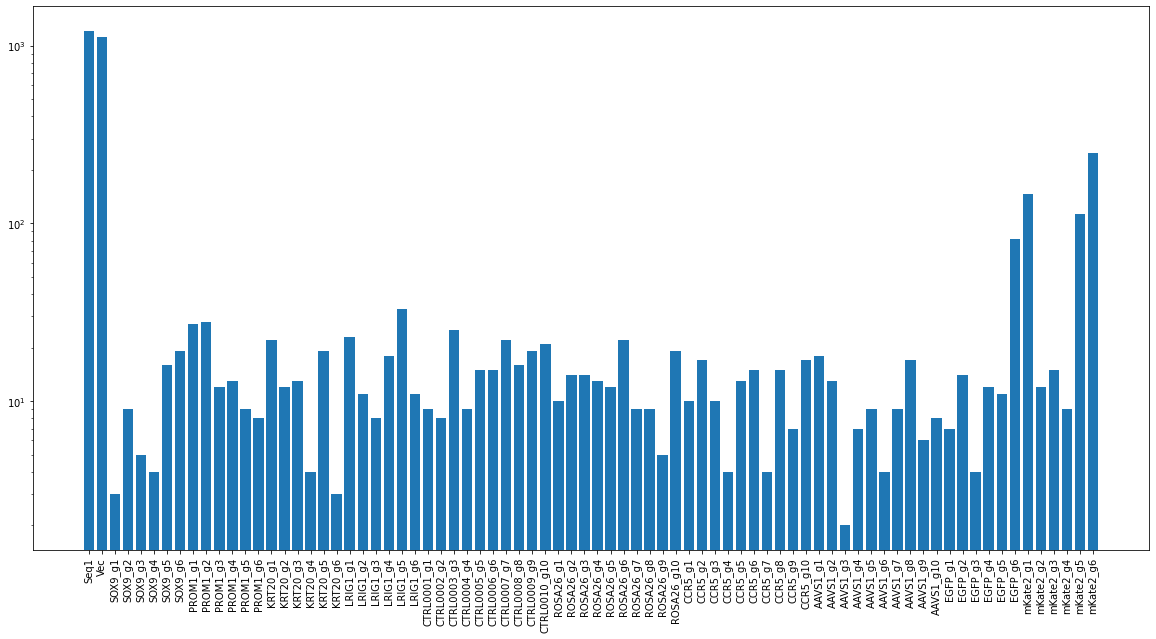

In [297]:
plt.figure(figsize=(20,10))
plt.bar(S6_read_counts.columns,S6_read_counts.loc[1, :] - S6_read_counts.loc[0, :])
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [330]:
def division(n, d):
    return n / d if d else 0

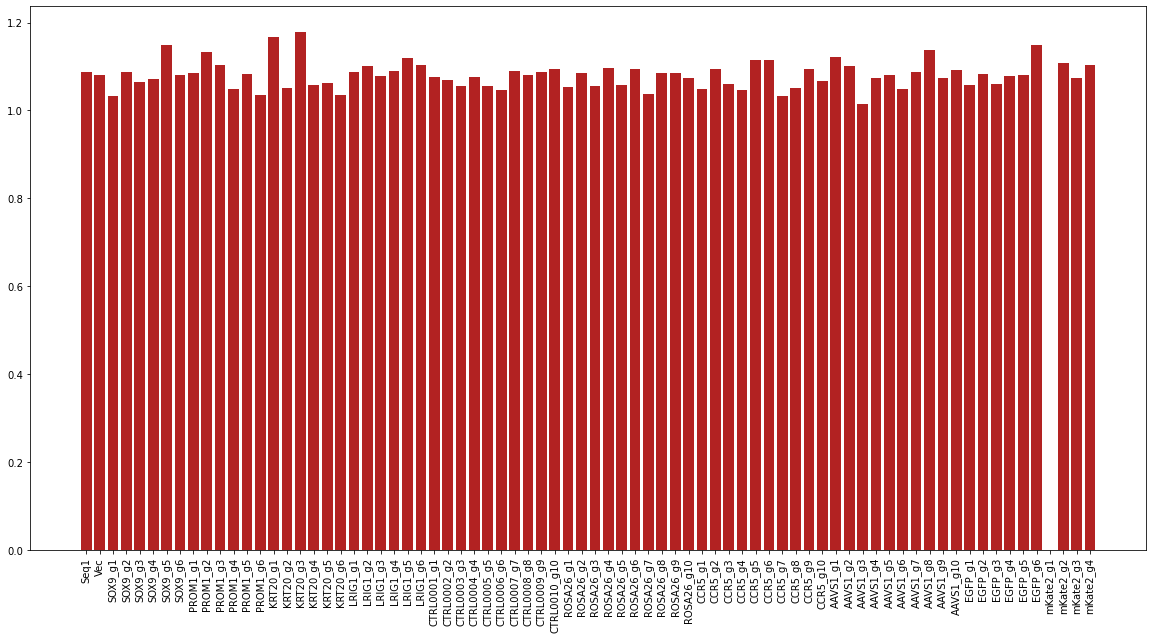

In [332]:
plt.figure(figsize=(20,10))
plt.bar(S6_read_counts.columns[:-2],[division(S6_read_counts.iloc[1, i], S6_read_counts.iloc[0, i])for i in range(78)][:-2], color="firebrick")
plt.xticks(rotation=90)
plt.show()

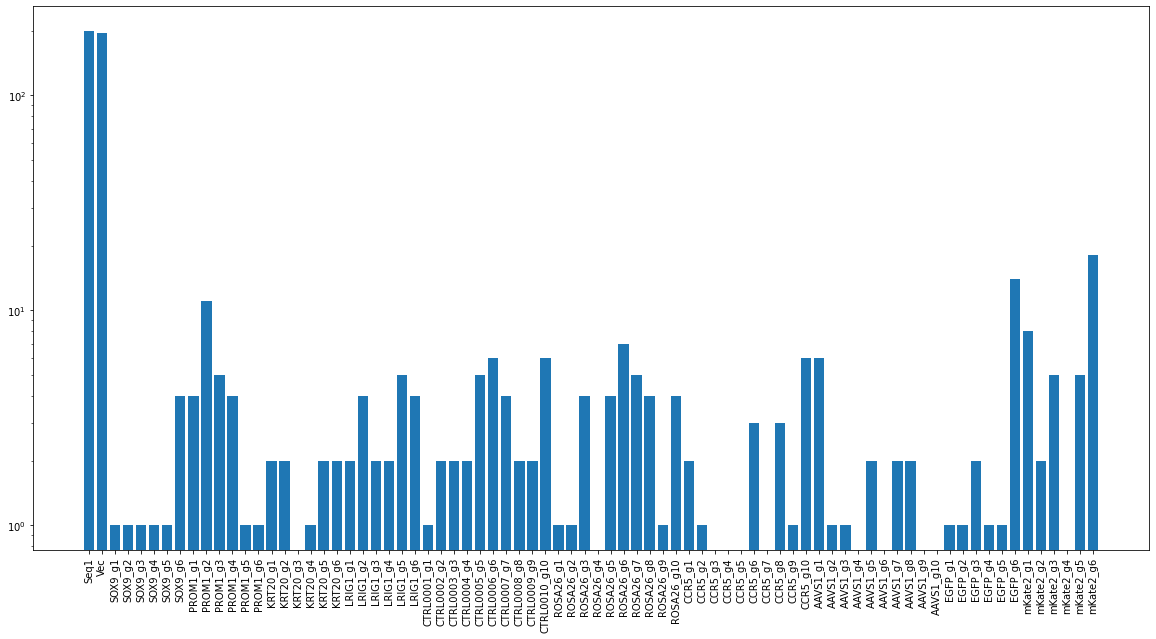

In [298]:
plt.figure(figsize=(20,10))
plt.bar(S6_read_counts.columns,S6_read_counts.loc[2, :] - S6_read_counts.loc[1, :])
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

# CutAdapt Parameters

1. cutadapt -a GTTTAAGAGCT -g CGAAACACCG -j 4 -e 1.5 --rc -m 19 -o output.fastq input.fastq 

2. 
read 2:
cutadapt -g CGAAACACCG -a GTTTAAGAGC -j 4 -e 2.5 -m 19 -o output.fastq input.fastq

read 1:
cutadapt -a CGGTGTTTCG  -g GCTCTTAAAC -j 4 -e 2.5 -m 19 -o output.fastq input.fastq

3. cutadapt --pair-adapters -j 4 -e 1.5 -m 19 -a GTTTAAGAGC -g CGAAACACCG -A CGGTGTTTCG -G GCTCTTAAAC -o out.1.fastq -p out.2.fastq in.1.fastq in.2.fastq

cutadapt --pair-adapters -j 4 -e 1.5 -m 19 -a GTTTAAGAGC -g CGAAACACCG -A CGGTGTTTCG -G GCTCTTAAAC -o 20200709_6_NS8056_S6_R1_001_trimmed.fastq -p 20200709_6_NS8056_S6_R2_001_trimmed.fastq 20200709_6_NS8056_S6_R1_001.fastq 20200709_6_NS8056_S6_R2_001.fastq

cutadapt --pair-adapters -j 4 -e 1.5 -m 19 -g GTTTAAGAGC -a CGAAACACCG -G CGGTGTTTCG -A GCTCTTAAAC -o 20200709_6_NS8056_S6_R1_001_trimmed.fastq -p 20200709_6_NS8056_S6_R2_001_trimmed.fastq 20200709_6_NS8056_S6_R1_001.fastq 20200709_6_NS8056_S6_R2_001.fastq

cutadapt -a CGGTGTTTCG -g GCTCTTAAAC -j 4 -e 2.5 -m 19 -o 20200709_6_NS8056_S6_R1_001_trimmed.fastq 20200709_6_NS8056_S6_R1_001.fastq


cutadapt -a CGAAACACCG -g GTTTAAGAGC -j 4 -e 2.5 -m 19 -o 20200709_6_NS8056_S6_R1_001_trimmed_1.fastq 20200709_6_NS8056_S6_R1_001_trimmed.fastq

-a 3' -g 5'

mageck count -l library.txt -n demo --sample-label S6_1,S6_2 --fastq 20200709_6_NS8056_S6_R1_001_trimmed.fastq 20200709_6_NS8056_S6_R2_001_trimmed.fastq
